# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [1]:
pip install seaborn

  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install seaborn --upgrade

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#경고문을 무시하는 코드.
import warnings
warnings.filterwarnings(action='ignore')


tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

## rugplot, kdeplot, displot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

Text(0.5, 1.0, 'Total bill의 rugplot')

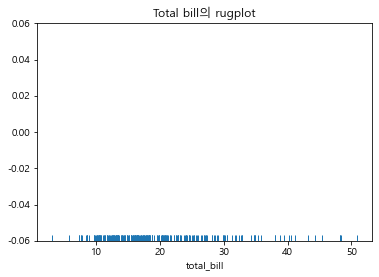

In [8]:
#rugplot은 데이터프레임과 연동이 잘된다.
sns.rugplot(x="total_bill",data=tips) #data=DataFrame, 값(x) = "컬럼명"
plt.title("Total bill의 rugplot")

### rugplot 
- 각 데이터들의 위치를 보여준다.

Text(0.5, 1.0, 'Total bill의 rugplot')

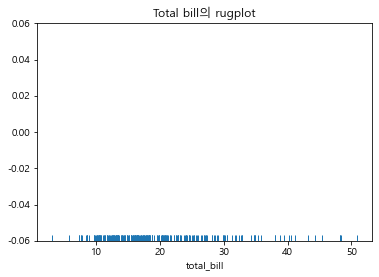

In [9]:
#rugplot은 데이터프레임과 연동이 잘된다.
sns.rugplot(x="total_bill",data=tips) #data=DataFrame, 값(x) = "컬럼명"
plt.title("Total bill의 rugplot")

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

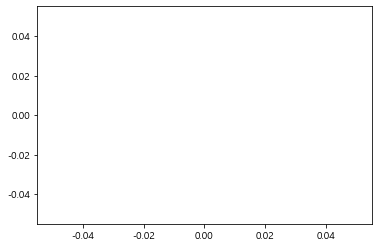

In [16]:
#그냥, kdeplot은 히스토그램을 부드러운 형태로 표현한다고 볼 수 있다.
#지금 오류가 뜨는 건 seaborn, matplotlib과 pandas 버전들의 불일치 때문이다.
sns.kdeplot(data=tips,x='total_bill')
sns.kdeplot(data=tips,x='tip')
plt.show()

## displot()
- 히스토그램을 기준으로 rugplot, kdeplot을 같이 그릴 수 있다.

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

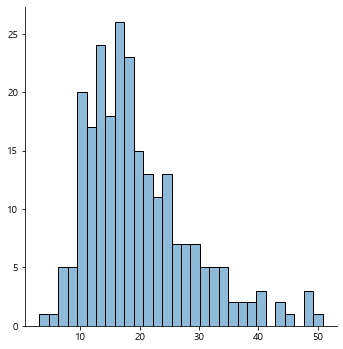

In [21]:
sns.displot(data=tips,x='total_bill',bins=30,rug=True,kde=True)
plt.show()
#지금 오류 난 것도, 당연히 버전 불일치 오류이다>

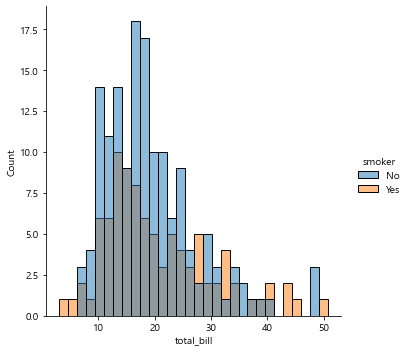

In [32]:
tips.groupby("smoker")['total_bill']
sns.displot(x='total_bill',hue="smoker",bins=30,data=tips) #이런 식으로, groupby를 하고, 그래프를 그릴 수도 있다.
#tips 데이터프레임의 total_bill 컬럼의 히스토그램을 smoker 컬럼의 값별로 다른색으로 그려라.

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

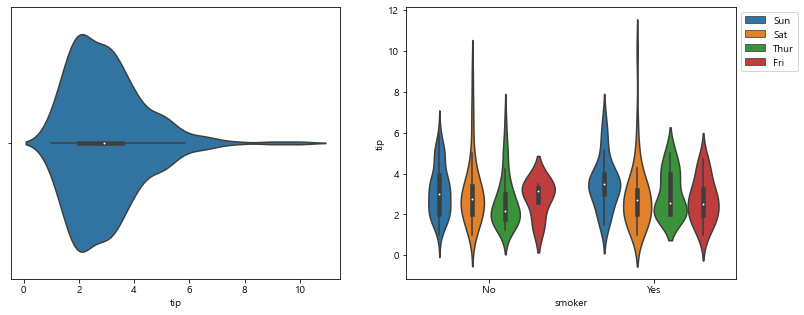

In [9]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)

sns.violinplot(data=tips,x='tip')


#subplot을 통해서 그래프를 하나 더 그려보자.
plt.subplot(1,2,2)
sns.violinplot(data=tips,y='tip',x='smoker',hue='day')
plt.legend(bbox_to_anchor=(1,1),loc='upper left') #legend와 bbox_to_anchor을 통해 범례를 잘 표현하도록 하자.
plt.show()

#그래프를 그려보면, 모양이 가오리.....가 아니라 바이올린 같아서 violin plot이라고 한다.
#그리고, 잘 보면 boxplot이 따로 더 있는 것을 알 수 있다.
#연속된 값들의 범위와 수량을 동시에 볼 수 있다.



### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

<AxesSubplot:ylabel='tip'>

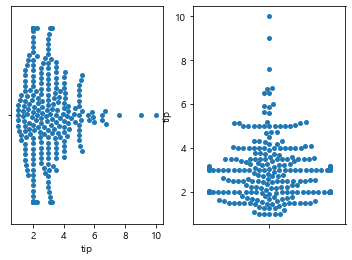

In [12]:
plt.subplot(1,2,1)
sns.swarmplot(data=tips,x='tip')


plt.subplot(1,2,2)
sns.swarmplot(data=tips,y='tip')


#모양을 보면, 상당히 신기하게 그린다는 것을 알 수 있다.
#약간, 데이터들을 상대로 점을 찍는다는 것을 알 수 있다.



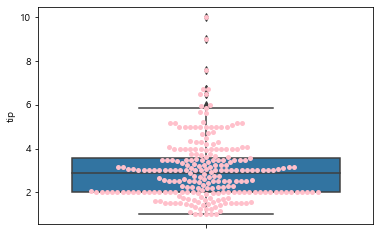

In [15]:
#boxplot과 비교를 해보자.
#그래프를 같이 그려줘서, 서로의 plot을 비교할 수 있다.

sns.boxplot(data=tips,y='tip')
sns.swarmplot(data=tips,y='tip',color='pink')
plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

<AxesSubplot:xlabel='smoker'>

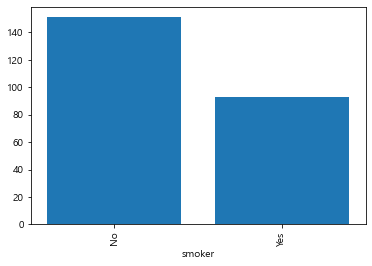

In [20]:
#countplot을 그리는 방법은 다른 plot과는 조금 다르다.

v=tips.smoker.value_counts()
plt.bar(v.index,v)


v.plot(kind='bar')

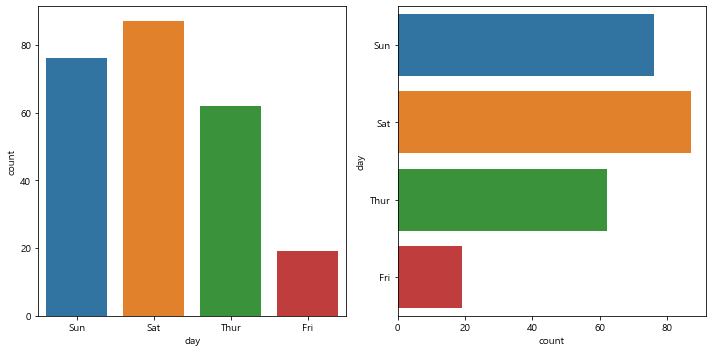

In [26]:
#더 많은 데이터를 countplot에 표현해보자.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=tips,x='day') #범주형 컬럼을 지정해 주면, 범주값(고유값)별로 개수를 세서 막대그래프를 그린다.


plt.subplot(1,2,2)
sns.countplot(data=tips,y='day')
#x축에 지정을 하느냐, y축에 지정을 하느냐에 따라서 수직막대그래프인지 수평막대그래프인지가 나뉜다.

plt.tight_layout()
plt.show()

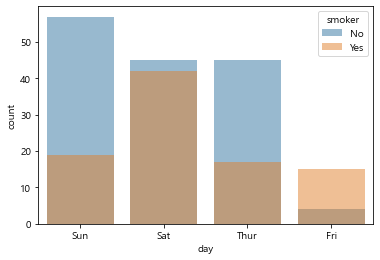

In [35]:
sns.countplot(data=tips,x='day',hue='smoker',dodge=False,alpha=0.5) #hue는 기준을 의미한다.
#dodge을 false로 바꿔주면, 데이터를 누적으로 보여준다.
# hue에 지정한 컬러의 값 별로 나눠서 그린다.
#alpha는 투명도!

plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [40]:
###팔레트 설정

sns.set_palette("deep")#set3 등도 있다.

In [39]:
##현재 팔레트의 색 순서를 조회할 수 있다.

sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

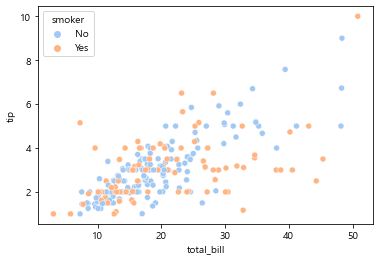

In [42]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='smoker',palette='pastel') #이런 식으로 hue와 palette를 바꿀 수 있다.
plt.show()

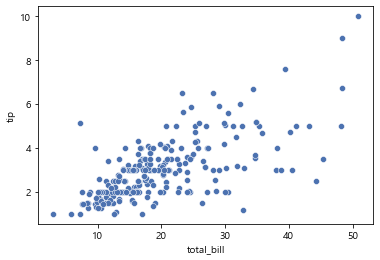

In [44]:
sns.scatterplot(data=tips,x='total_bill',y='tip')
plt.show()

In [45]:
tips[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.

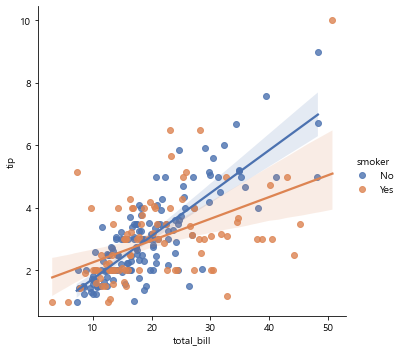

In [48]:
sns.lmplot(data=tips,x='total_bill',y='tip',hue='smoker')
plt.show()

#lmplot은 여러가지 기능을 합친 느낌이다.
#데이터가 많이 쌓이다 보면, 그래프의 형태 등이 많이 달라질 수 있다.

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

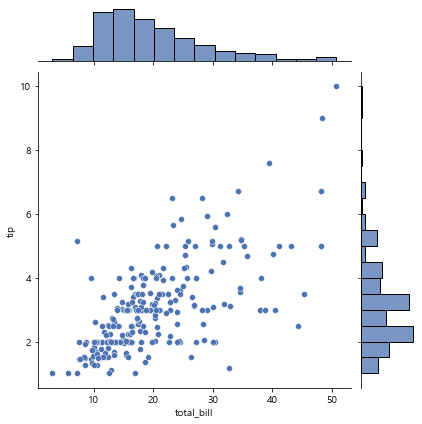

In [50]:
sns.jointplot(data=tips,x='total_bill',y='tip')
plt.show()

#위의 것은 total_bill의 히스토그램을 그려주고, 옆의 것은 tip의 히스토그램을 그려준다.

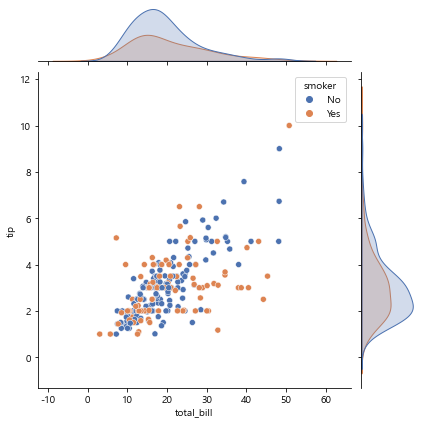

In [52]:
sns.jointplot(data=tips,x='total_bill',y='tip',hue='smoker') #hue로 나눠서 히스토그램이 kde plot으로 변경이 된다.
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

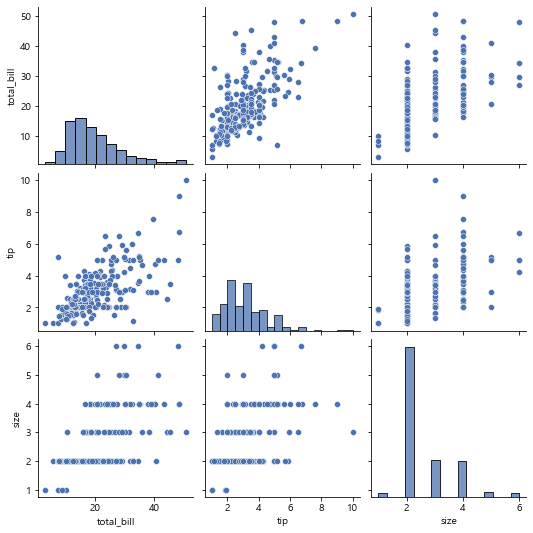

In [55]:
sns.pairplot(tips) #dataframe을 전달. 각 컬럼(변수) 끼리의 산점도를 그린다.
plt.show()

#그래프를 잘 보면, 같은 놈들 끼리는 산점도를 굳이 그릴 필요가 없다는 것을 볼 수 있다.
#근데, pairplot은 데이터가 많은 경우에는 시간이 몇십분씩 걸리는 경우가 있다.
#그래서..... 엥간하면 하지 마라.

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [59]:
dia=pd.read_csv('data/diamonds.csv')
cor=dia.corr(numeric_only=True) #숫자인 것들만 가지고 값을 구하도록 하자.
cor

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


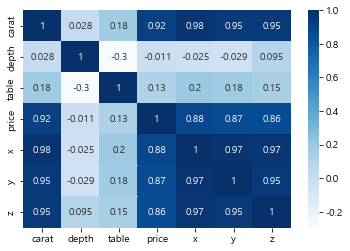

In [64]:
sns.heatmap(cor,annot=True,cmap="Blues") #히트맵에는 2차원 데이터셋이 있다.
#annot을 통해 상관관계의 숫자를 잘 볼 수 있고, cmap을 통해 그래프의 색을 바꿀 수 있다.
plt.show()

#상관관계가 밝을 수록 높을 것이다.

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [67]:
df = pd.read_excel('data/강수량.xlsx')
df.set_index("계절",inplace=True)
df= df.T
df

#일단 df을 새롭게 정의했다. 



계절,봄,여름,가을,겨울
2009,231.3,752.0,143.1,142.3
2010,302.9,692.6,307.6,98.7
2011,256.9,1053.6,225.5,45.6
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1
2017,118.6,609.7,172.5,75.6


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

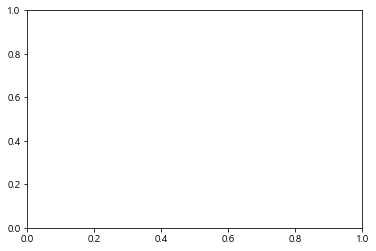

In [71]:
sns.lineplot(data=df,x=df.index,y='봄')
sns.lineplot(data=df,x=df.index,y='겨울')
#오류가 떴다면, 이는 seaborn의 버전 탓이다.
plt.ylabel("강수량")
plt.legend(['봄','겨울'],title="강수량")
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

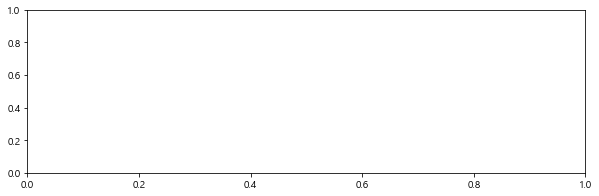

In [74]:
plt.figure(figsize=(10,3))

sns.lineplot(data=df)
#index: x축,y: 컬럼별로 선그래프를 그린다.
plt.legend(bbox_to_anchor=(1,1),loc="upper left")
plt.show()